In [25]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 
from math import pi as PI
import random
# !pip3 install higher
import torch.nn as nn
import torch
import random
from higher import innerloop_ctx
import warnings

from data import RegressionDomain
from constants import *

ax_size=16
title_size=18

results_dir = "./report_plots/"
dpi = 800

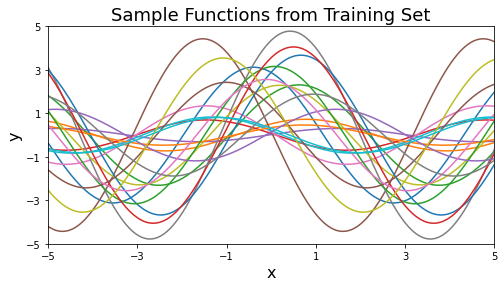

In [35]:
'''
Generate figure for sample of various sine functions from domain 
'''
seed = 7
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

dataset = RegressionDomain(amp_min=amp_min, amp_max=amp_max, 
                            phase_min=phase_min, phase_max=phase_max)

num_show = 20 # number of waves to show
num_points = 1000 # dense plotting

sample_funcs = dataset.get_meta_train_batch(num_show)

fig, ax = plt.subplots(figsize=(8,4))

for wave in sample_funcs:
    samples = wave.get_samples(num_points)
    x = samples["input"].detach().numpy()
    y = samples["output"].detach().numpy()
    sorted_coords = sorted([(x_val, y_val) for (x_val, y_val) in zip(x, y)], key=lambda l: l[0])
    ax.plot([x[0] for x in sorted_coords],[x[1] for x in sorted_coords])
    
ax.set_xlim([-5.0, 5.0])
ax.set_ylim([-5.0, 5.0])

ax.set_title("Sample Functions from Training Set", fontsize=title_size)
ax.set_xlabel("x", fontsize=ax_size)
ax.set_ylabel("y", fontsize=ax_size)

ax.set_yticks(np.arange(-5.0, 5.0+1, 2.0))
ax.set_xticks(np.arange(-5.0, 5.0+1, 2.0))

plt.savefig(f"{results_dir}sample_funcs.pdf",dpi=dpi, bbox_inches="tight")

In [14]:
sorted_coords

[(-4.9539666, 0.2335255),
 (-4.844437, 0.21312377),
 (-4.356946, 0.0954005),
 (-2.665385, -0.28453988),
 (-0.37646064, 0.14085585),
 (0.0516962, 0.23392494),
 (1.1736122, 0.25764528),
 (2.486479, -0.06534229),
 (3.6331942, -0.28545392),
 (4.885969, -0.14357331)]

In [10]:
'''
Alg comparison k-Shot Plots
'''

num_k_shots = 10

algs = ["MAML", "MAML + CA", "Reptile"]
alg_files = [f"maml_sine_{num_k_shots}.npy", f"maml_ca_sine_{num_k_shots}.npy", f"Reptile/reptile_sine_{num_k_shots}.npy"]

all_alg_data = [np.load(alg_file) for alg_file in alg_files]



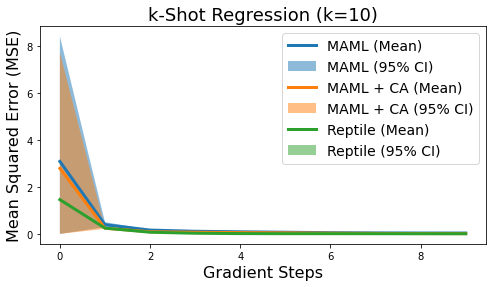

In [11]:
fig, ax = plt.subplots(figsize=(8,4))

for alg, alg_data in zip(algs, all_alg_data):  

    mean_loss = np.mean(alg_data, axis=0)

    # confidence interval plotting help from: https://stackoverflow.com/questions/59747313/how-to-plot-confidence-interval-in-python
    y = mean_loss
    x = list(range(num_k_shots))
    ci = 1.96 * np.std(alg_data, axis=0)**2/np.sqrt(len(y))

    ax_size=16
    title_size=18

    ax.plot(x, y, linewidth=3, label=f"{alg} (Mean)")
    # to avoid having MSE < 0
    truncated_error = np.clip(y-ci, a_min=0, a_max=None)
    ax.fill_between(x, truncated_error, (y+ci), alpha=.5,label=f"{alg} (95% CI)")

ax.set_xlabel("Gradient Steps",fontsize=ax_size)
ax.set_ylabel("Mean Squared Error (MSE)",fontsize=ax_size)
ax.set_title(f"k-Shot Regression (k={num_k_shots})",fontsize=title_size)
# help with legend size: https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
ax.legend(prop={'size': 14})#loc="upper right")
plt.savefig("comparative_sine_wave_reg_kshot.png")
# ax.set_ylim([0,7])